#  Computing Gradients

In [2]:
from theano import pp,function

In [3]:
import theano.tensor as T

In [11]:
x = T.dscalar('x')

In [12]:
y = x ** 2

In [13]:
gy = T.grad(y, x)

In [14]:
pp(gy)

'((fill((x ** TensorConstant{2}), TensorConstant{1.0}) * TensorConstant{2}) * (x ** (TensorConstant{2} - TensorConstant{1})))'

In [15]:
f = function([x], gy)

In [16]:
f(4)

array(8.0)

In [17]:
f(94.2)

array(188.4)

====================================================

In [51]:
x = T.dscalar('x')
gy2 = T.fill(x**2,1) * 2 * x
f2 = function([x],gy2)
f2(4)

array(8.0)

=====================================================

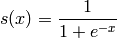

In [55]:
from IPython.display import Image
Image(filename='logisticFunc.png')

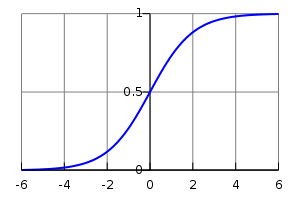

In [56]:
Image(filename='logistic.png')

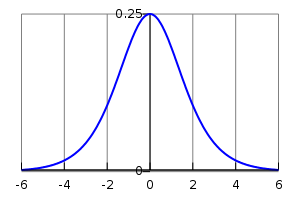

In [53]:

Image(filename='dlogistic.png')

In [60]:
x = T.dmatrix('x')

In [61]:
s = T.sum(1 / (1 + T.exp(-x)))

In [62]:
gs = T.grad(s, x)

In [63]:
dlogistic = function([x], gs)

In [64]:
dlogistic([[0, 1], [-1, -2]])

array([[ 0.25      ,  0.19661193],
       [ 0.19661193,  0.10499359]])

In [65]:
t = 1 / (1+T.exp(-x))
gt = T.grad(t, x)

TypeError: cost must be a scalar.

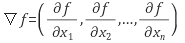

In [66]:
Image(filename='gradientFunc.png')

# Computing the Jacobian

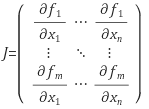

In [67]:
Image(filename='jacobianFunc.png')

In [69]:
import theano

In [70]:
x = T.dvector('x')

In [71]:
y = x ** 2

In [72]:
J, updates = theano.scan(lambda i, y,x : T.grad(y[i], x), sequences=T.arange(y.shape[0]), non_sequences=[y,x])

In [73]:
f = function([x], J, updates=updates)

In [74]:
f([4, 4])

array([[ 8.,  0.],
       [ 0.,  8.]])

In [75]:
f([3,4])

array([[ 6.,  0.],
       [ 0.,  8.]])

y1 = x1**2
y2 = x2**2

J = [[2x1,0],[0,2x2]]

# Computing the Hessian

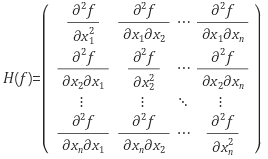

In [76]:
Image(filename='hessianFunc.png')

In [77]:
x = T.dvector('x')

In [78]:
y = x ** 2

In [79]:
cost = y.sum()

In [80]:
gy = T.grad(cost, x)

In [81]:
H, updates = theano.scan(lambda i, gy,x : T.grad(gy[i], x), sequences=T.arange(gy.shape[0]), non_sequences=[gy, x])

In [82]:
f = function([x], H, updates=updates)

In [83]:
f([4, 4])

array([[ 2.,  0.],
       [ 0.,  2.]])

In [84]:
f([5,6])

array([[ 2.,  0.],
       [ 0.,  2.]])

y = x**2
y1 = x1**2
y2 = x2**2
f = y1+y2 = x1**2 + x2**2
[[2,0],[0,2]]

# Jacobian times a Vector

R-operator

In [85]:
Image(filename='ropFunc.png')

In [22]:
W = T.dmatrix('W')

In [23]:
V = T.dmatrix('V')

In [24]:
x = T.dvector('x')

In [25]:
y = T.dot(x, W)

In [26]:
JV = T.Rop(y, W, V)

In [27]:
f = theano.function([W, V, x], JV)

In [28]:
f([[1, 1], [1, 1]], [[2, 2], [2, 2]], [0,1])

array([ 2.,  2.])

L-operator

In [86]:
Image(filename='ropFunc.png')

In [29]:
W = T.dmatrix('W')

In [30]:
v = T.dvector('v')

In [31]:
x = T.dvector('x')

In [32]:
y = T.dot(x, W)

In [33]:
VJ = T.Lop(y, W, v)

In [34]:
f = theano.function([v,x], VJ)

In [35]:
f([2, 2], [0, 1])

array([[ 0.,  0.],
       [ 2.,  2.]])

# Hessian times a Vector

In [36]:
x = T.dvector('x')

In [37]:
v = T.dvector('v')

In [38]:
y = T.sum(x ** 2)

In [39]:
gy = T.grad(y, x)

In [40]:
vH = T.grad(T.sum(gy * v), x)

In [41]:
f = theano.function([x, v], vH)

In [42]:
f([4, 4], [2, 2])

array([ 4.,  4.])

R-operator

In [43]:
x = T.dvector('x')

In [44]:
v = T.dvector('v')

In [45]:
y = T.sum(x ** 2)

In [46]:
gy = T.grad(y, x)

In [47]:
Hv = T.Rop(gy, x, v)

In [48]:
f = theano.function([x, v], Hv)

In [49]:
f([4, 4], [2, 2])

array([ 4.,  4.])